In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df.shape

(5172, 3002)

In [11]:
#input data
x = df.drop(['Email No.','Prediction'],axis=1)

#output data
y = df['Prediction']

In [13]:
x.shape

(5172, 3000)

In [15]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [17]:
set(x.dtypes)

{dtype('int64')}

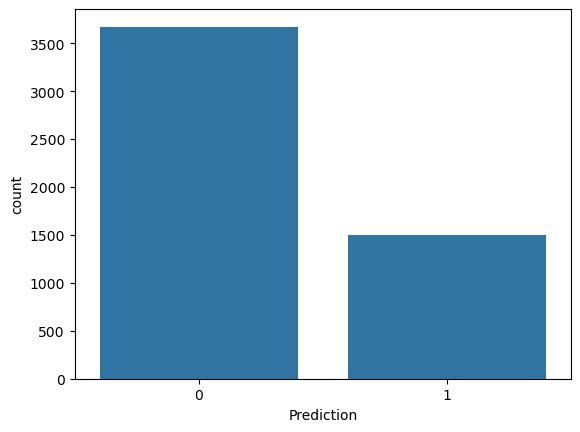

In [19]:
import seaborn as sns
sns.countplot(x = y);

In [21]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [23]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
#Cross-Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [29]:
x_scaled.shape

(5172, 3000)

In [31]:
x_train.shape

(3879, 3000)

In [33]:
x_test.shape

(1293, 3000)

In [35]:
#import the class
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
#Train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
#Predict on test data
y_pred = knn.predict(x_test)

In [43]:
#import the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293

